<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Вступление" data-toc-modified-id="Вступление-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Вступление</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Замена-типов" data-toc-modified-id="Замена-типов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Замена типов</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка пропусков</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Игры-и-платформы-в-разные-годы" data-toc-modified-id="Игры-и-платформы-в-разные-годы-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Игры и платформы в разные годы</a></span></li><li><span><a href="#Продажи-и-потенциально-прибыльные-платформы" data-toc-modified-id="Продажи-и-потенциально-прибыльные-платформы-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Продажи и потенциально прибыльные платформы</a></span></li><li><span><a href="#Жанры" data-toc-modified-id="Жанры-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Жанры</a></span></li></ul></li><li><span><a href="#Портрет-пользователя" data-toc-modified-id="Портрет-пользователя-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Портрет пользователя</a></span><ul class="toc-item"><li><span><a href="#Популярные-платформы" data-toc-modified-id="Популярные-платформы-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Популярные платформы</a></span></li><li><span><a href="#Популярные-жанры" data-toc-modified-id="Популярные-жанры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Популярные жанры</a></span></li><li><span><a href="#Влияние-рейтинга-ESRB" data-toc-modified-id="Влияние-рейтинга-ESRB-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Влияние рейтинга ESRB</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Описание проекта

Имея данные о продажах, пользовательских и экспертных оценках видеоигр за период с 1985 по 2016 год необходимо выявить закономерности, определяющие успешность игр. Это необходимо для того, чтобы предположить какие игры будут популярны в следующем, 2017 году.

В рамках проекта необходимо также проверить две гипотезы:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<div style="border:solid green 2px; padding: 20px">
    
    Небольшой дисклеймер. Все комментарии в тетради написаны c учетом того, что сейчас конец 2016 года, поэтому фразы "в данный момент", "сейчас" и т.д. привязаны к 2016 году.

## Вступление

In [1]:
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('games.csv')

In [2]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


В наборе представлены данные с информацией по продажам и оценкам видеоигр, выпущенных в период с 1980 по 2016 годы. Продажи разбиты на несколько регионов: Северную Америку, Европу и Японию, а продажи в других регионах собраны в одном отдельном столбце. 

Всего в наборе 16715 строк и 11 столбцов, при том в 6 столбцах присутствуют пропущенные значения. 

Столбец *Year_of_Release*, который содержит сведения о годе выпуска игры представлен в не очень удобном дробном формате, а в столбце *User_score* некорректный тип данных (object), хотя он состоит из числовых данных. Каких-то аномальных значений, на первый взгляд, в данных не обнаружено.

## Подготовка данных

### Замена типов

In [5]:
# приводим названия столбцов к нижнему регистру

data.columns = [col.lower() for col in data.columns]
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
print('Количество игр с оценкой TBD:', data.query('user_score == "tbd"')['user_score'].count())

Количество игр с оценкой TBD: 2424


В данном случае я не меняю пропуски, а только меняю формат данных. Это безусловно изменит оценки со значением TBD в NaN, об этом подробнее в [выводах](#cell22).

In [7]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') 

In [8]:
print('Количество игр с оценкой TBD:', data.query('user_score == "tbd"')['user_score'].count())

Количество игр с оценкой TBD: 0


In [9]:
# считаем и добавляем новый столбец с общими продажами

data['total_sales'] = data['na_sales'] + data['eu_sales'] + data ['jp_sales'] + data['other_sales']

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
total_sales        16715 non-null float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


### Обработка пропусков

In [11]:
# заполняем данные по году выпуска нулями, чтобы сменить тип данных для корректного отображения года
data['year_of_release'] = data['year_of_release'].fillna(0).astype(int) 

In [12]:
data['name'].isna().sum()

2

In [13]:
# находим конкретные строки с пропущенными значениями в столбце name
display(data[data['name'].isna()] == True)

# посмотрим на них полностью 
data.query('index == 659 | index == 14244')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,False,False,False,False,False,False,False,False,False,False,False,False
14244,False,False,False,False,False,False,False,False,False,False,False,False


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


In [14]:
# переименовываем эти значения 
data[['name','genre']] = data[['name','genre']].fillna('undefined')

<a id='cell22'><a/>

В столбцах critic_Score, user_Score и rating больше всего пропусков - около 40-50%. В остальных столбцах всего несколько пропущенных значений, они не смогут оказать значимого влияния на данные. 

В данных по году выпуска 269 пропущенных значений, которые мешают сменить тип данных, поэтому заполним их значениями 0. Это не повлияет на результаты исследования, так как мы не будем считать агрегированные данные в столбце с годом выпуска, но позволит сменить тип данных и отображать год корректно.

Значение tbd в оценках значит, что оценка еще не сформирована и подлежит уточнению (tbd - to be determined с англ.). Один из крупнейших агрегаторов оценок для игр в мире Metacritic [использует](https://www.metacritic.com/faq#item13) tbd для объектов, у которых меньше 4 отзывов в базе. В рамках замены типа данных в предыдущем пункте все строки столбца user_score с tbd были обработаны как NaN. 
Их можно было бы заменить на нулевые значения, но в данном случае 0 не является оценкой, лишь подтверждает отсутствие оценки, поэтому для корректной работы с этим столбцом пришлось бы постоянно исключать строки с 0, чтобы они не оказывали влияние на результаты. В данном случае, для работы со столбцом изначально пропущенные значения и tbd не имеют существенной разницы, поэтому они обработаны как NaN. 

Столбцы *user_score*, *critic_score* и *rating* имеют много пропущенных значений, однако заполнять их точными данными в данной ситуации нельзя, а использовать какие-то средние или нулевые значения некорректно. Пропуски могут быть связаны как с отсутствием оценки у игры из-за малого количества отзывов (хотя в таком случае по идее должно быть указание tbd), так и с некорректной выгрузкой данных. Также это может быть связано с отсутствием оценок и рейтингов по старым играм 90-х годов: в то время просто не было агрегаторов и возрастных рейтингов.

В столбцах *name* и *genre* есть две строки с отсутсвующими значениями, это две игры 1993 года для платформы Sega Genesis с данными только о продажах. Их можно удалить и это не окажет значимого влияния на исследование, однако их можно переименовать и сохранить для статистики, так данные будут формально полными.

## Анализ данных

### Игры и платформы в разные годы

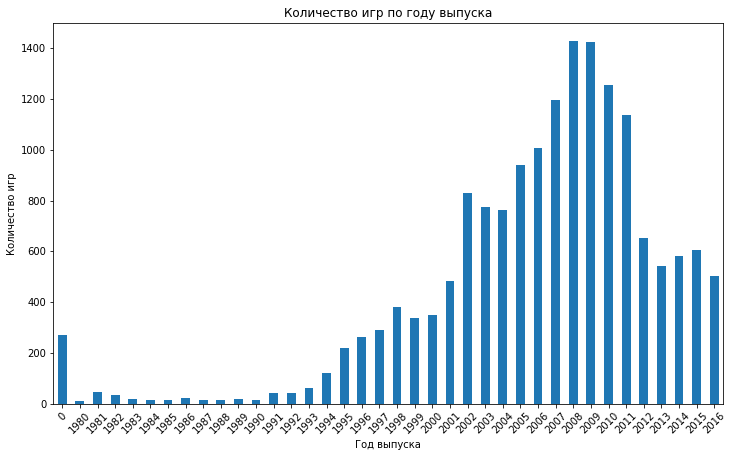

In [15]:
# группируем данные по годам
data.groupby('year_of_release')['name'].count().plot(
    kind='bar', x='year_of_release', figsize=(12,7),
    title='Количество игр по году выпуска', rot=45
);
plt.xlabel('Год выпуска');
plt.ylabel('Количество игр');

In [16]:
print('Количество игр, выпущенных с 2000 года:', data.query('year_of_release >= 2000')['name'].count()) 
print('Количество игр, выпущенных в период 2002-2011:', data.query('2002 <= year_of_release <= 2011')['name'].count()) 

Количество игр, выпущенных с 2000 года: 14470
Количество игр, выпущенных в период 2002-2011: 10752


Преобладающее большинство игр в базе выпущены в 21 веке, однако больше всего названий с датой релиза в 2002-2011 гг.

In [17]:
# топ-10 платформ по суммарным продажам
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64

In [18]:
# сохраняем первые 10 платформ по суммарным продажам в переменную  
s = data.groupby('platform')['total_sales'].sum().reset_index().rename(
    {'total_sales': 'platform_sales'}, axis=1).sort_values(
    by='platform_sales', ascending=False).head(10).reset_index(
    drop=True)
s

,platform,platform_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


In [19]:
# создаем новую таблицу, в которой объединяем основную таблицу с только что 
# созданной по суммарным продажам топ-10 платформ
platforms = data.merge(s.rename(columns={'index': 'platform'}), on='platform')
platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,907.51
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,907.51
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,907.51
3,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91,907.51
4,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32,907.51


In [20]:
# группируем платформы по количеству по годам и количеству игр в них

top10platforms = (
    platforms.groupby(['platform', 'platform_sales', 'year_of_release'])['name'].count()
        .reset_index(name='games_count')
        .sort_values('year_of_release')
        .reset_index(drop=True)
        .round(2)
)
top10platforms

,platform,platform_sales,year_of_release,games_count
0,DS,806.12,0,30
1,PC,259.52,0,17
2,GBA,317.85,0,11
3,PS2,1255.77,0,34
4,PS3,939.65,0,25
...,...,...,...,...
121,PS3,939.65,2016,38
122,PC,259.52,2016,54
123,Wii,907.51,2016,1
124,PS4,314.14,2016,164


2151 игр всего для DS 
822 игр всего для GBA 
974 игр всего для PC 
1197 игр всего для PS 
2161 игр всего для PS2 
1331 игр всего для PS3 
392 игр всего для PS4 
1209 игр всего для PSP 
1320 игр всего для Wii 
1262 игр всего для X360 


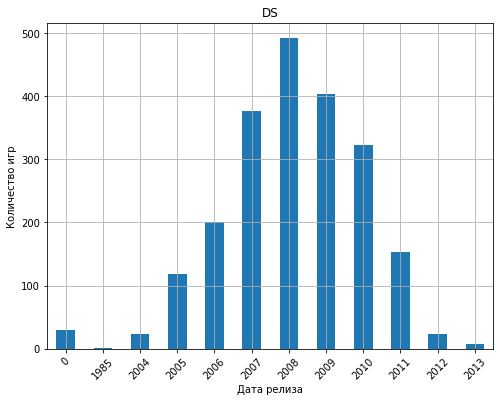

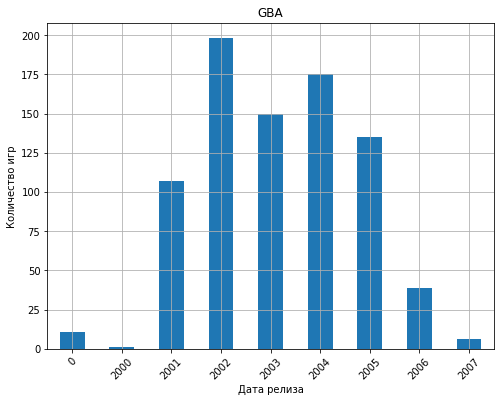

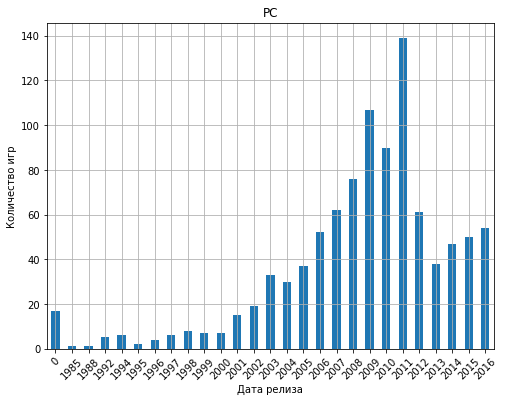

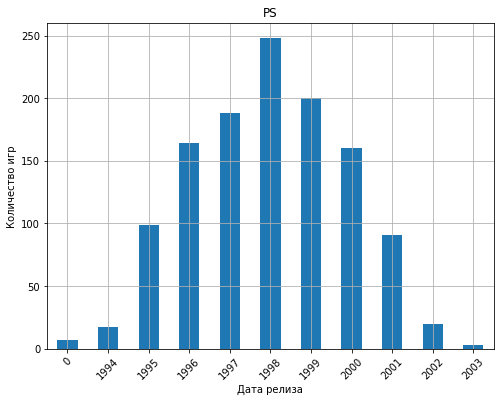

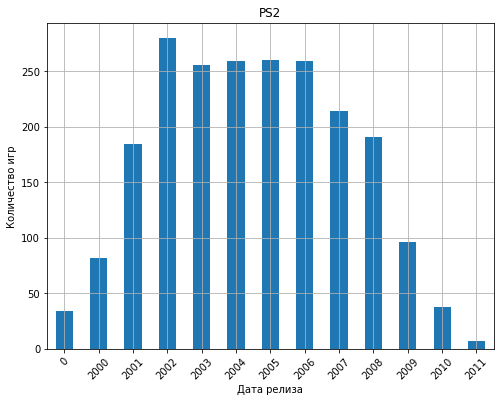

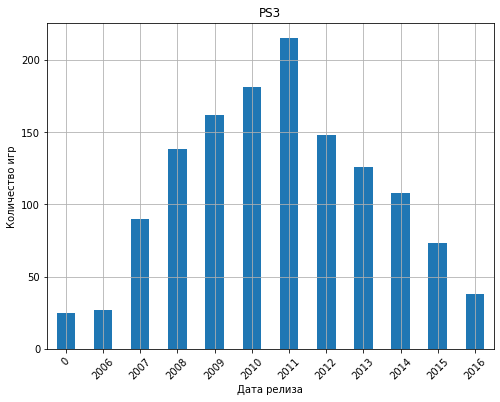

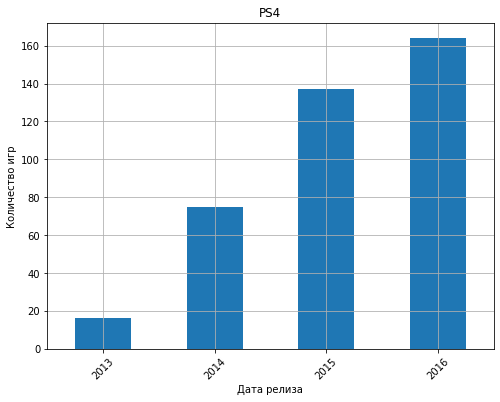

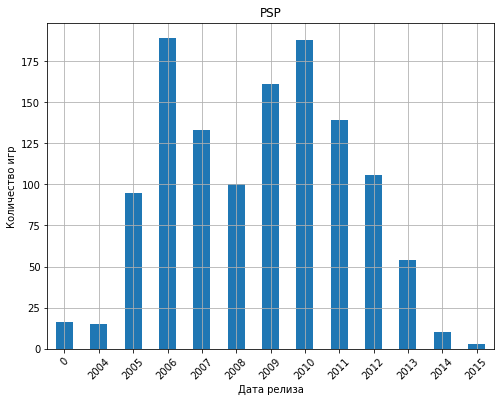

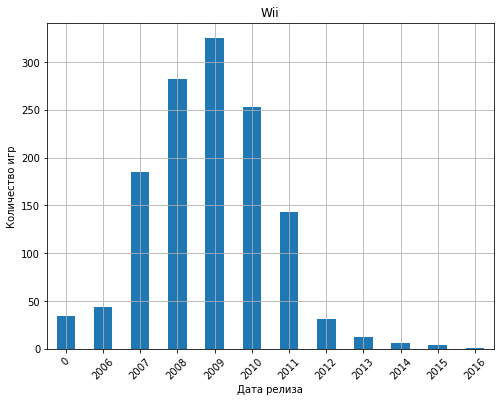

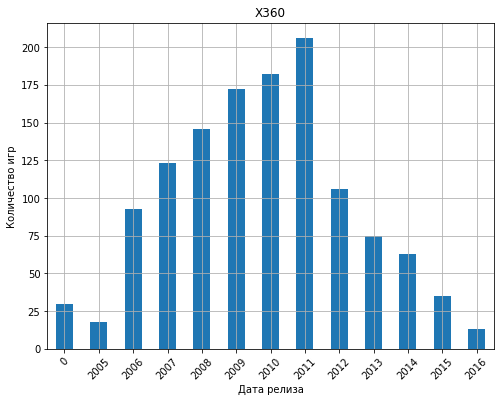

In [21]:
# cтроим графики для каждой платформы с распределением по годам

for platform, top10data in top10platforms.groupby('platform'):
    print('{} игр всего для {} '.format((top10data['games_count']).sum(), platform));
    top10data.plot(
        kind='bar', x='year_of_release', y='games_count',
        title=platform, figsize=(8, 6), rot=45, 
        grid=True, legend=False
    )
    plt.xlabel('Дата релиза')
    plt.ylabel('Количество игр')

In [22]:
# группируем данные по продажам за год для каждой платформы из топ-10
ys = platforms.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index().rename(
    {'total_sales': 'sales_per_year'}, axis=1)

# создаем новую таблицу, в которой объединяем основную таблицу с только что созданной по суммарным продажам топ-10 платформ
plats_per_yearsales = platforms.merge(ys.rename(columns={'index': 'platform'}), on=['platform', 'year_of_release'])
plats_per_yearsales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_sales,sales_per_year
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,907.51,137.15
1,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91,907.51,137.15
2,The Legend of Zelda: Twilight Princess,Wii,2006,Action,3.74,2.14,0.60,0.68,95.0,9.0,T,7.16,907.51,137.15
3,WarioWare: Smooth Moves,Wii,2006,Puzzle,0.86,1.04,0.73,0.26,83.0,7.4,E10+,2.89,907.51,137.15
4,Super Monkey Ball: Banana Blitz,Wii,2006,Misc,1.05,0.91,0.04,0.24,74.0,5.7,E,2.24,907.51,137.15


In [23]:
# группируем платформы по продажам за год

top10platforms_yearsales = (
    plats_per_yearsales.groupby(['platform', 'year_of_release'])['sales_per_year'].max().reset_index()
    .sort_values('year_of_release')
    .reset_index(drop=True)
)

# взял max, т.к. здесь используются уже имеющиеся данные из столбца и аггрегировать ничего не надо
top10platforms_yearsales

,platform,year_of_release,sales_per_year
0,DS,0,3.34
1,PC,0,3.76
2,GBA,0,4.97
3,PS2,0,22.21
4,PS3,0,8.31
...,...,...,...
121,PS3,2016,3.60
122,PC,2016,5.25
123,Wii,2016,0.18
124,PS4,2016,69.25


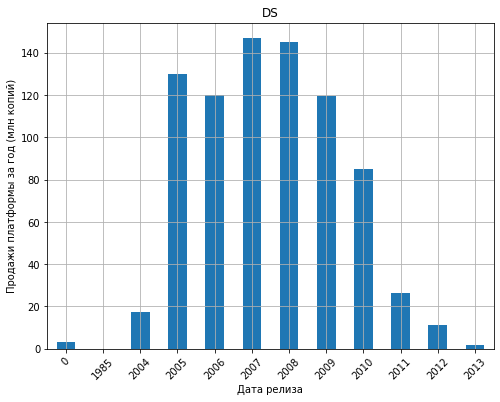

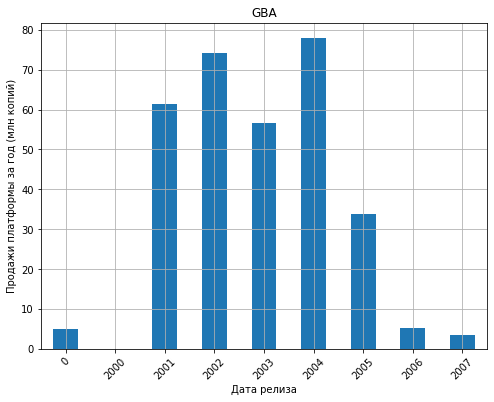

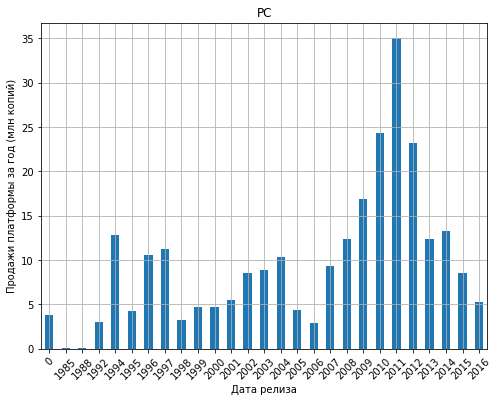

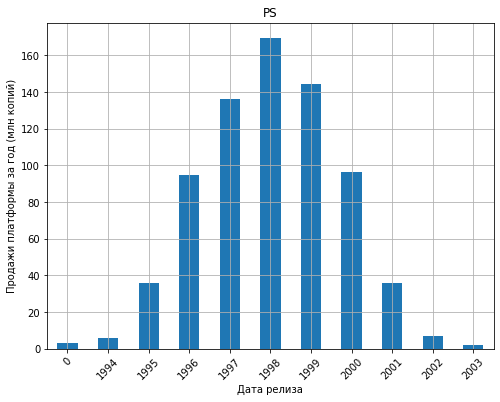

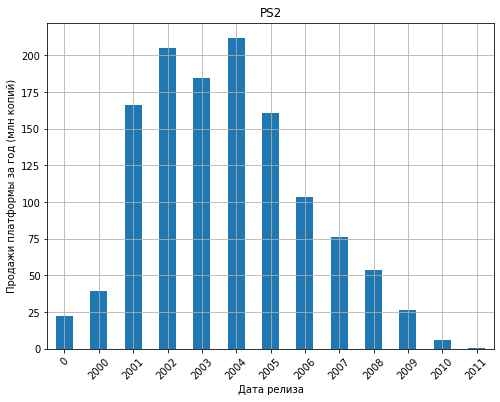

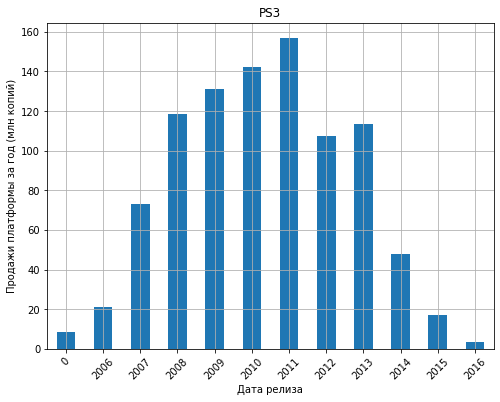

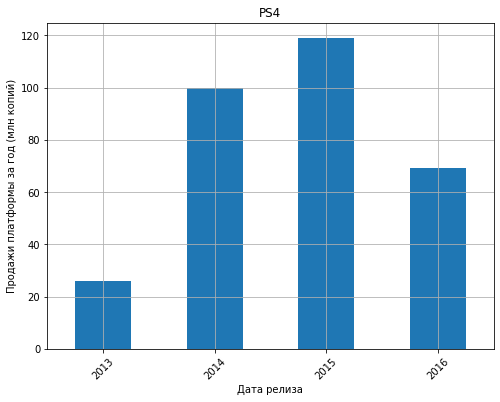

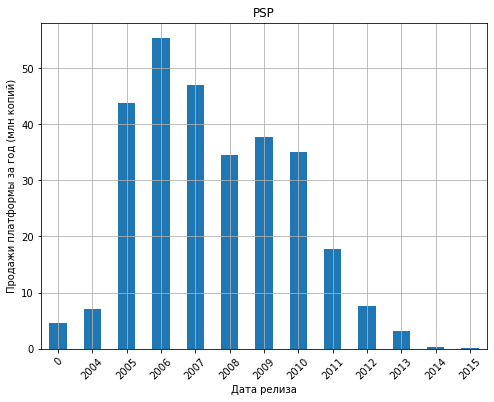

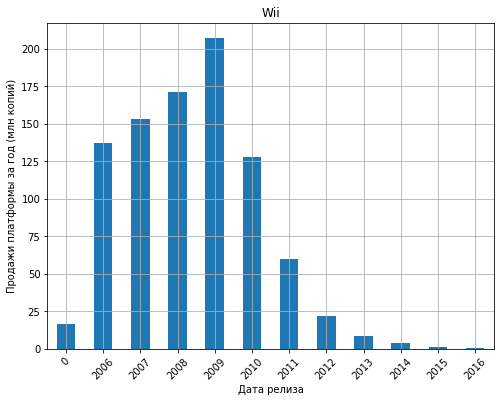

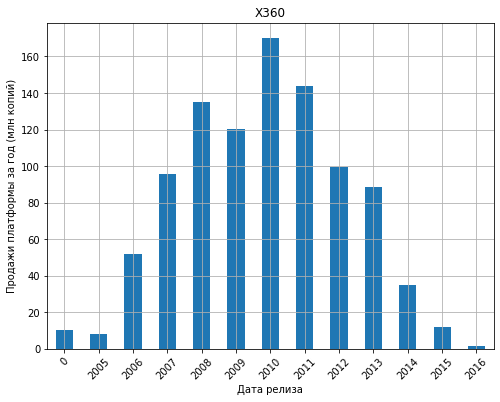

In [24]:
# cтроим графики для каждой платформы по продажам с распределением по годам

for platform, top10data in top10platforms_yearsales.groupby('platform'):
    top10data.plot(
        kind='bar', x='year_of_release', y='sales_per_year',
        title=platform, figsize=(8, 6), rot=45,
        grid=True, legend=False
    )
    plt.xlabel('Дата релиза')
    plt.ylabel('Продажи платформы за год (млн копий)')

In [25]:
data.query('name == "Grand Theft Auto V"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
1730,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.00,0.09,96.0,7.9,M,1.17


По графикам можно заметить, что пик выпуска игр приходится на 3-5 год после анонса поколения. Игры на платформы в топ-10 хорошо продаются в течение 6-8 лет после старта. Также графики демонстрируют связь между количеством, выпущенных игр и продажами на платформе: чем больше выходит игр в год для платформы, тем больше их продается.

При этом нужно понимать, что рынок видеоигр имеет некоторые особенности. Так, основные производители Sony и Microsoft (Nintendo в меньшей степени) представляют новую консоль и открывают поколение, например Xbox 360, а в дальнейшем еще несколько раз представляют новые приставки в рамках этого же поколения. Например, обновленная X360, а потом еще одна, уже под конец поколения. Таким образом продлевается срок жизни поколения. В нашей базе (не только в ней, но и в целом) нет разделения на версии консолей в рамках одного поколения, так как все игры для Xbox 360 будут работать и на оригинальной (первой) приставке, и на обновленной (последней). Этим можно объяснить пики в количестве релизнутых игр после нескольких лет спадов.

В среднем поколения в рамках одного бренда (и формата) сменяются раз в 5-7 лет, так первая Playstation вышла в 1994 году, вторая — в 2000, PS3 — в 2006, а последняя на данный момент консоль Playstation 4 появилась в продаже в 2013 году. У Microsoft на старте бренда Xbox цикл был короче, однако в дальнейшем он выровнялся и синхронизировался с главным конкурентом. 
У Nintendo cитуация схожая: консоль Nintendo Game Cube (в базе GC) вышла в 2001 году, в 2006 в продаже появилась Wii, в 2011 — Wii U. Стоит отметить, что у Sony и Nintendo параллельно с домашними версиями консолей выпускаются портативные версии: линейки PSP и Nintendo DS, которые также в свою очередь развиваются с теми же сроками. При этом выход новых консолей не отменяет одномоментно предыдущие, так как оба поколения некоторое время существуют одновременно, а игры выпускаются на каждое. 

Небольшое количество игр в первый год (год старта продаж) также можно объяснить особенностью индустрии: ключевые производители, как правило, выпускают новые приставки в конце года (обычно в ноябре), ближе к рождественским праздникам в западном мире. Также, обычно к старту продаж нового поколения разработчики не успевают подготовить много игр и делают это постепенно. 

В базе присутствует свыше 16 тысяч строк с играми, однако важно отметить, что игры не все игры уникальны. Одна и та же игра может выйти сразу на несколько платформ и иметь разные версии, отличающуюся оптимизацию и другие различия. Поэтому в базе отражены продажи и оценки на каждую из платформ для одной игры, а оценки они могут отличаться из-за причин, упомянутых выше. Например, одна самых продаваемых в мире на данный момент игр Grand Theft Auto V представлена в базе в 5 строках для разных платформ и брендов.

Конечно же, все это неактуально для рынка PC, у которого нет цикличности и разделения на поколения.

###### Актуальный период

Выбор актуального периода для прогноза на следующий год, логично предпринимать на основе актуальных на данный момент платформ на рынке и их расположения в цикле бренда. 
Так, с очень высокой вероятностью в следующем году и далее будут популярны игры **актуальных на данный момент поколений**.
Поэтому актуальным периодом можно назвать период со старта последнего на данный момент поколения платформ ведущих брендов, то есть, с 2013 года по сегодняшний день, конец 2016 года.

In [26]:
# создаем таблицу с данными за актуальный период
data_relevant = data.query('year_of_release >= 2013')
data_relevant.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


### Продажи и потенциально прибыльные платформы

In [27]:
# все платформы и их суммарные продажи в актуальном периоде
data_relevant.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()

,platform,total_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80
5,WiiU,64.63
6,PC,39.43
7,PSV,32.99
8,Wii,13.66
9,PSP,3.50


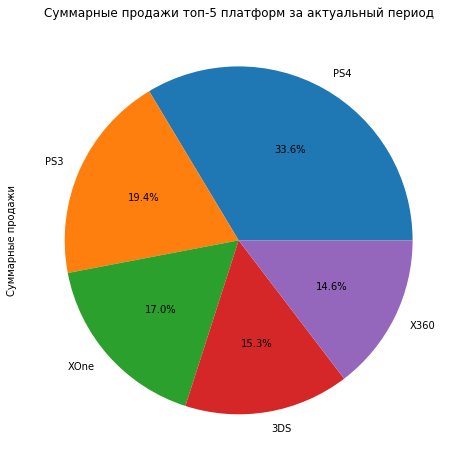

In [28]:
# построим график продаж по платформам
data_relevant.groupby('platform')['total_sales'].sum().sort_values(
    ascending=False).reset_index().head(5).set_index('platform').plot(
    kind='pie', y='total_sales', figsize=(8, 8), legend=False,
    title='Суммарные продажи топ-5 платформ за актуальный период', 
    autopct='%.1f%%'
);
plt.ylabel('Суммарные продажи');

Всего в актуальный период представлены игры для 11 платформ, однако наибольшие продажи, естественно, у текущего и предыдущего поколения платформ. Определенную долю рынка продаж также занимают портативные консоли PS, Wii и персональные компьютеры.

С высокой вероятностью в следующем году будут продаваться игры для PS4, так как поколение появилось на рынке в конце 2013 года и только выходит на пик судя по продажам последних лет и предыдущим поколениям бренда, а новые версии Slim и Pro, поступившие в продажу в прошлом месяце должны только подстегнуть продажи; Xbox One — несмотря на то, что продажи на них существенно ниже, это новое поколение и игры на него будут появляться. 

Учитывая продажи игр для предыдущей портативной консоли Nintendo — 3DS, на определенную долю на рынке может рассчитывать анонсированная недавно новая консоль Switch, которая поступит в продажу в начале 2017 года.

In [29]:
# посмотрим на данные по продажам по каждой платформе за каждый год актуального периода
data_relevant.pivot_table(index='year_of_release', columns='platform', aggfunc={'total_sales':'sum'})

total_sales                                                  \
platform                3DS    DS     PC     PS3     PS4   PSP    PSV   Wii   
year_of_release                                                               
2013                  56.57  1.54  12.38  113.25   25.99  3.14  10.59  8.59   
2014                  43.76   NaN  13.28   47.76  100.00  0.24  11.90  3.75   
2015                  27.78   NaN   8.52   16.82  118.90  0.12   6.25  1.14   
2016                  15.14   NaN   5.25    3.60   69.25   NaN   4.25  0.18   

                                      
platform          WiiU   X360   XOne  
year_of_release                       
2013             21.65  88.58  18.96  
2014             22.03  34.74  54.07  
2015             16.35  11.96  60.14  
2016              4.60   1.52  26.15

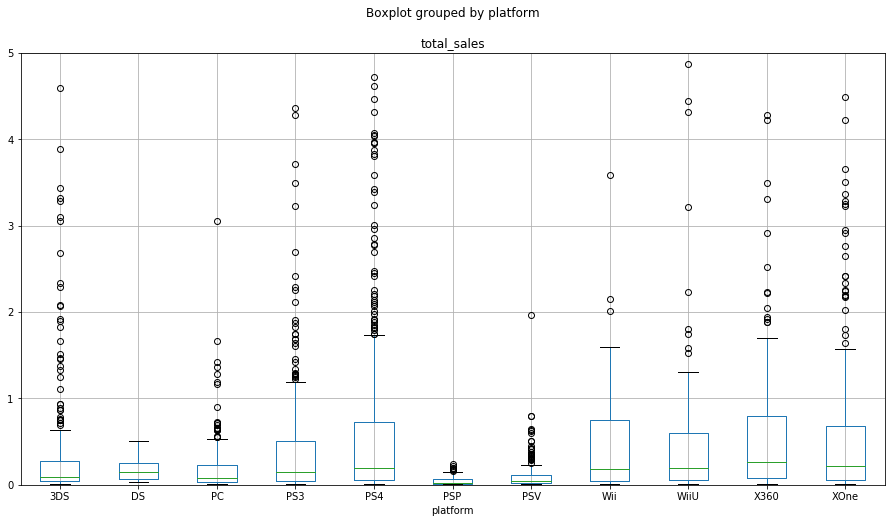

In [30]:
boxplot_platforms = data_relevant.boxplot('total_sales', by='platform', figsize=(15,8));
boxplot_platforms.set_ylim(0, 5);

In [31]:
# функция для подсчета межквартильного интервала (не моя, нашел в интернете, она мне понравилась больше других)

def outliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
      
    print("IQR для столбца %s: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data
      
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]

In [32]:
# межквартильное расстояние и количество выбросов в исходной таблице
outliers(data, 'total_sales')
print("Выбросов обнаружено:", data['total_sales'].count() - filtered_data['total_sales'].count())

IQR для столбца total_sales: 0.41
Выбросов обнаружено: 1890


In [33]:
# межквартильное расстояние и количество выбросов в таблице за актуальный период
outliers(data_relevant, 'total_sales')
print("Выбросов обнаружено:", data_relevant['total_sales'].count() - filtered_data['total_sales'].count())

IQR для столбца total_sales: 0.37
Выбросов обнаружено: 267


In [34]:
data_relevant.query('total_sales > 10')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24


In [35]:
print('GTA V продана тиражом', data_relevant.query('name == "Grand Theft Auto V"')['total_sales'].sum(), 'млн копий')

GTA V продана тиражом 56.58 млн копий


Диаграмма размаха для всех платформ актуального периода показывает, что среднее и медиана сосредоточены в районе меньше 1 млн проданных копий. Именно с этим и связано большое количество выбросов на каждой платформе. Выходит очень много игр и большинство из них никогда не достигнет отметки в миллион копий, межквартильное расстояние маленькое, соответственно, для выброса на большинстве платформ достаточно значения около миллиона копий. Хоть и выбросов много везде, но наиболее аномальные выбросы имеются только на самых популярных платформах. 

Около 10% выпущенных игр могут выйти на уровень продаж выше миллиона и лишь единицам удается превзойти порог в 10 млн (таких игр всего 7 и три из них это одна и та же игра — Grand Theft Auto V). Вообще, одна только GTA V имеет суммарные продажи больше чем половина консолей за актуальный период. Именно она расположена на самых верхних точках на диаграмме размаха выше. 

Удалять выбросы в данном случае не очень целесообразно, они связаны с особенностями индустрии и не мешают исследованию, а наоборот, позволяют лучше понимать данные.

In [36]:
# для диаграммы рассеяния и корреляции создаем сводную таблицу с оценками и продажами по PS4
ps4 = data_relevant.query('platform =="PS4"').pivot_table(
    index='name', 
    values=['user_score', 'critic_score', 'total_sales'])

ps4.corr()

,critic_score,total_sales,user_score
critic_score,1.000000,0.406568,0.557654
total_sales,0.406568,1.000000,-0.031957
user_score,0.557654,-0.031957,1.000000


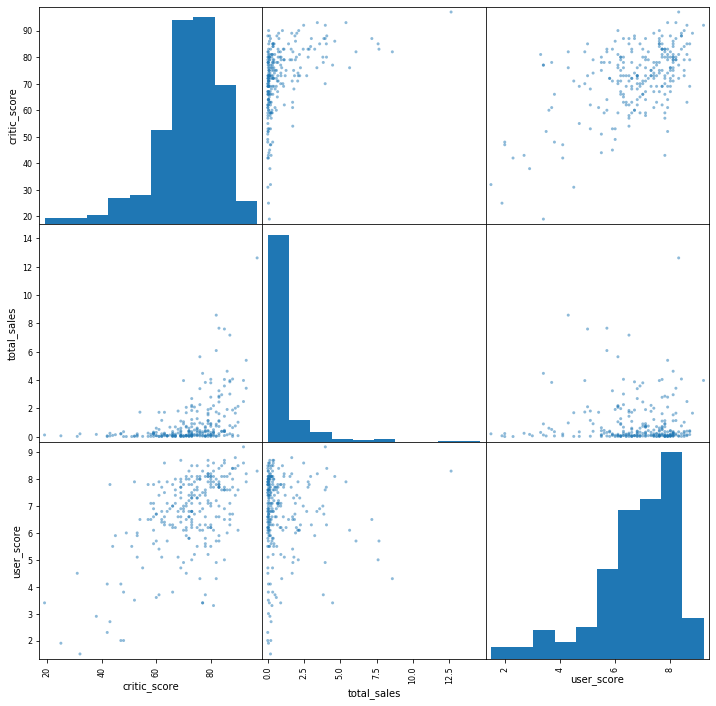

In [37]:
pd.plotting.scatter_matrix(ps4, figsize=(12, 12));

In [38]:
# для диаграммы рассеяния и корреляции создаем сводную таблицу с оценками и продажами по Xbox One
xone = data_relevant.query('platform =="XOne"').pivot_table(
    index='name', 
    values=['user_score', 'critic_score', 'total_sales'])

xone.corr()

,critic_score,total_sales,user_score
critic_score,1.000000,0.416998,0.472462
total_sales,0.416998,1.000000,-0.068925
user_score,0.472462,-0.068925,1.000000


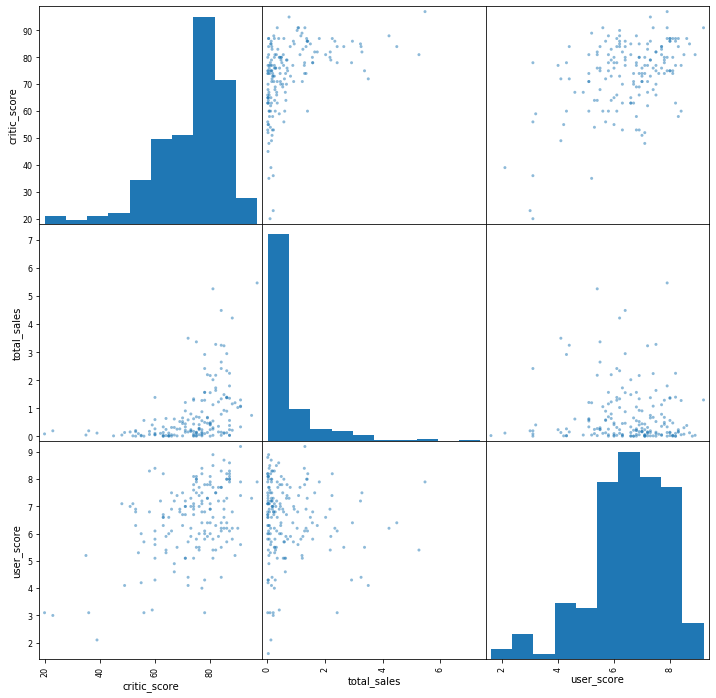

In [39]:
pd.plotting.scatter_matrix(xone, figsize=(12, 12));

In [40]:
# смотрим корреляцию на других популярных платформах и рынке PC, как наиболее отличающимся

ps3 = data_relevant.query('platform =="PS3"').pivot_table(
    index='name', 
    values=['user_score', 'critic_score', 'total_sales'])

ds3 = data_relevant.query('platform =="3DS"').pivot_table(
    index='name', 
    values=['user_score', 'critic_score', 'total_sales'])

x360 = data_relevant.query('platform =="X360"').pivot_table(
    index='name', 
    values=['user_score', 'critic_score', 'total_sales'])

pc = data_relevant.query('platform =="PC"').pivot_table(
    index='name', 
    values=['user_score', 'critic_score', 'total_sales'])

display(ps3.corr())
display(ds3.corr())
display(x360.corr())
display(pc.corr())

,critic_score,total_sales,user_score
critic_score,1.000000,0.334285,0.599920
total_sales,0.334285,1.000000,0.002394
user_score,0.599920,0.002394,1.000000


,critic_score,total_sales,user_score
critic_score,1.000000,0.357057,0.769536
total_sales,0.357057,1.000000,0.241504
user_score,0.769536,0.241504,1.000000


,critic_score,total_sales,user_score
critic_score,1.000000,0.350345,0.520946
total_sales,0.350345,1.000000,-0.011742
user_score,0.520946,-0.011742,1.000000


,critic_score,total_sales,user_score
critic_score,1.000000,0.196030,0.429562
total_sales,0.196030,1.000000,-0.093842
user_score,0.429562,-0.093842,1.000000


Диаграммы рассеяния и коэффициенты корреляции показывают, что нет ощутимой связи между оценкам игроков или критиков и продажами игры. Показатели схожие как у PS4, так и у Xbox One. Да, видна некоторая корреляция между продажами и оценками критиков, а также между оценками пользователей и критиков между собой, однако и она не очень высокая.

Однако есть небольшая разница в оценках критиков и пользователей. Так, например, игр с низкими оценками критиков и большими продажами просто не существует и большинство хорошо продающихся игр имеют высокие рейтинги. При этом у пользовательских рейтингов ситуация несколько иная: есть достаточно примеров игр с оценкой около 5 или меньше и высокими продажами. 

На других популярных платформах, а также рынке PC ситуация отличается несильно и, в целом, схожа. На Nintendo 3DS наблюдается достаточно сильная корреляция между оценка критиков и пользователей, а также чуть большая, но все еще достаточно слабая корреляция между продажами и оценками юзеров, чего не наблюдалось на других платформах.

В целом, можно сказать, что хорошие оценки совсем не гарантируют хорошие продажи, однако высокие продажи практически невозможны без высоких оценок (в первую очередь, среди критиков).

### Жанры

In [41]:
# группируем таблицу актуального периода по суммарным продажам платформ 

genres = data_relevant.groupby('genre')['total_sales'].agg(
    ['count', 'sum', 'mean']).sort_values(
    by='sum', ascending=False).reset_index().rename(
    {'mean': 'mean_sales', 'sum':'sum_sales', 'count':'games'},axis=1
    ).set_index('genre').round(2)

# добавляем столбцы с долей по проданным играм и по количеству игр 
genres['games_share'] = (100 * genres['games'] / genres['games'].sum()).round(2)
genres['sales_share'] = (100 * genres['sum_sales'] / genres['sum_sales'].sum()).round(2)
genres

,games,sum_sales,mean_sales,games_share,sales_share
genre,,,,,
Action,766,321.87,0.42,34.30,29.51
Shooter,187,232.98,1.25,8.37,21.36
Sports,214,150.65,0.70,9.58,13.81
Role-Playing,292,145.89,0.50,13.08,13.38
Misc,155,62.82,0.41,6.94,5.76
Platform,74,42.63,0.58,3.31,3.91
Racing,85,39.89,0.47,3.81,3.66
Fighting,80,35.31,0.44,3.58,3.24
Adventure,245,23.64,0.10,10.97,2.17


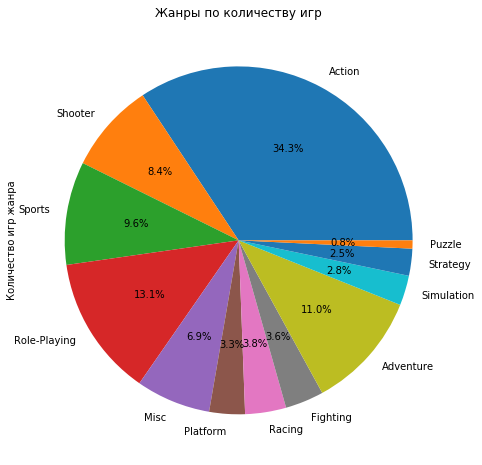

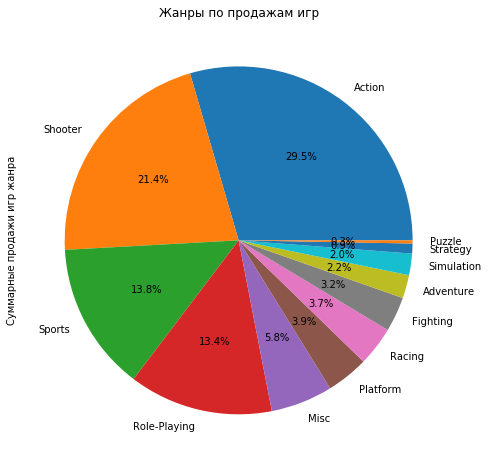

In [42]:
genres.plot(
    kind='pie', y='games', 
    figsize=(8,8), legend=False,
    title='Жанры по количеству игр',
    autopct='%.1f%%');
plt.ylabel('Количество игр жанра');

genres.plot(
    kind='pie', y='sum_sales', 
    figsize=(8,8), legend=False,
    title='Жанры по продажам игр',
    autopct='%.1f%%');
plt.ylabel('Суммарные продажи игр жанра');

In [43]:
# сортируем жанры по средним продажам 
genres.sort_values('mean_sales', ascending=False)

,games,sum_sales,mean_sales,games_share,sales_share
genre,,,,,
Shooter,187,232.98,1.25,8.37,21.36
Sports,214,150.65,0.70,9.58,13.81
Platform,74,42.63,0.58,3.31,3.91
Role-Playing,292,145.89,0.50,13.08,13.38
Racing,85,39.89,0.47,3.81,3.66
Fighting,80,35.31,0.44,3.58,3.24
Action,766,321.87,0.42,34.30,29.51
Misc,155,62.82,0.41,6.94,5.76
Simulation,62,21.76,0.35,2.78,2.00


Больше всего игр в жанрах action, RPG, adventure, sports и shooter. По суммарным продажам также лидируют эти игры, кроме жанра adventure, у которого много представителей, но достаточно низкие продажи. 

Лучшее соотношение продаж к количеству у шутеров, на одну игру приходится в среднем 1,25 миллионов проданных копий. Спортивные симуляторы также лидиируют в этом показателе: каждая игра в этом жанре в среднем продается 700 тыс. тиражом. 

При этом, несмотря на то, что в жанре экшен игр самые высокие продажи и больше всего игр, соотношение выпущенных игр к проданным копиям не очень высокое: среди 766 игр суммарно было продано 322 млн копий, что составляет около 400 тысяч копий на каждый тайтл. Платформеры, ролевые игры, гонки и файтинги имеют средние результаты и довольно неплохо продаются.

Хуже всего ситуация с паззлами, стратегиями и приключенческими играми. В среднем игры этого жанра продаются тиражами не более 200 тысяч копий и представителей этих жанров не очень много (опять же кроме adventure, которых выпущено крайне много, но их продажи оставляют желать лучшего. Имея долю рынка 11% от всех выпущенных игр всех жанров в актуальный период, доля продаж приключений составляет около 2%.  

## Портрет пользователя

### Популярные платформы

In [44]:
# сводная таблица по регионам и платформам
regions = data_relevant.pivot_table(index=['platform'], values=['na_sales', 'eu_sales','jp_sales'], aggfunc='sum')
# для понимания табличка с итоговой суммой по региону
data_relevant.pivot_table(index=['platform'], values=['na_sales', 'eu_sales','jp_sales'], aggfunc='sum', margins=True)

,eu_sales,jp_sales,na_sales
platform,,,
3DS,30.96,67.81,38.20
DS,0.85,0.00,0.57
PC,25.36,0.00,11.11
PS3,67.81,23.35,63.50
PS4,141.09,15.96,108.74
PSP,0.17,3.29,0.00
PSV,6.10,18.59,5.04
Wii,5.93,0.05,6.56
WiiU,19.85,10.88,29.21


In [45]:
# топ-5 платформ по продажам в каждом регионе
display(regions['na_sales'].sort_values(ascending=False).head())
display(regions['eu_sales'].sort_values(ascending=False).head())
display(regions['jp_sales'].sort_values(ascending=False).head())

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

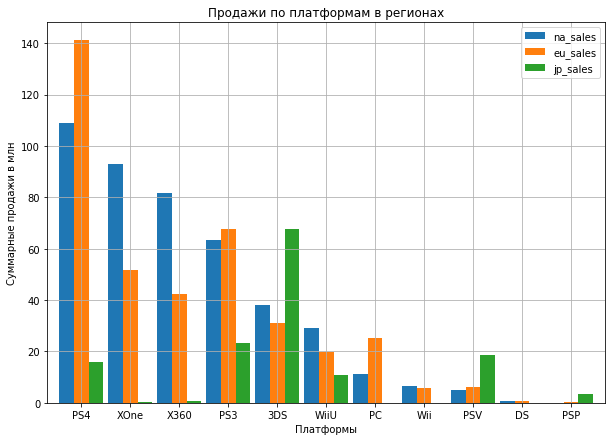

In [46]:
# сводный график по всем регионам
regions.sort_values(['na_sales','eu_sales','jp_sales'], ascending=False).plot(
    kind='bar', y=['na_sales','eu_sales','jp_sales'], 
    figsize=(10,7), grid=True, width=0.9, rot=0,
    title='Продажи по платформам в регионах');
plt.xlabel('Платформы');
plt.ylabel('Суммарные продажи в млн');

In [47]:
allreg = (regions['eu_sales'].sum() + regions['jp_sales'].sum() + regions['na_sales'].sum()).round(2)

print('Общий объем продаж в регионе NA —', regions['na_sales'].sum().round(2), 'млн копий')
print('Общий объем продаж в регионе EU —', regions['eu_sales'].sum().round(2), 'млн копий')
print('Общий объем продаж в регионе JP —', regions['jp_sales'].sum().round(2), 'млн копий')
print()
print('Всего продаж во всех регионах:', allreg, 'млн копий')

Общий объем продаж в регионе NA — 437.71 млн копий
Общий объем продаж в регионе EU — 392.23 млн копий
Общий объем продаж в регионе JP — 140.78 млн копий

Всего продаж во всех регионах: 970.72 млн копий


In [48]:
print('Доля продаж на всех платформах в регионе NA —', (regions['na_sales'].sum() / allreg * 100).round(2),'%')
print('Доля продаж на всех платформах в регионе EU —', (regions['eu_sales'].sum() / allreg * 100).round(2),'%')
print('Доля продаж на всех платформах в регионе JP —', (regions['jp_sales'].sum() / allreg * 100).round(2),'%')

Доля продаж на всех платформах в регионе NA — 45.09 %
Доля продаж на всех платформах в регионе EU — 40.41 %
Доля продаж на всех платформах в регионе JP — 14.5 %


In [49]:
nagames = data_relevant.query('na_sales > 0')['name'].count()
eugames = data_relevant.query('eu_sales > 0')['name'].count()
jpgames = data_relevant.query('jp_sales > 0')['name'].count()
namill = data_relevant.query('na_sales >= 1')['name'].count()
eumill = data_relevant.query('eu_sales >= 1')['name'].count()
jpmill = data_relevant.query('jp_sales >= 1')['name'].count()

<a id='cell402'><a/>

In [50]:
# смотрим на игры с любыми продажами (больше 0) в регионах и долю игр с продажами от 1 млн и выше

print(nagames,'игр с продажами в регионе NA')
print(eugames,'игр с продажами в регионе EU')
print(jpgames,'игр с продажами в регионе JP')
print()
print(namill, 'и', '{:.2%}'.format(namill / nagames), '— кол-во и доля игр с продажами от 1 млн в регионе NA')
print(eumill, 'и','{:.2%}'.format(eumill / eugames), '— кол-во и доля игр с продажами от 1 млн в регионе EU')
print(jpmill, 'и','{:.2%}'.format(jpmill / jpgames), '— кол-во и доля игр с продажами от 1 млн в регионе JP')

1309 игр с продажами в регионе NA
1422 игр с продажами в регионе EU
1187 игр с продажами в регионе JP

105 и 8.02% — кол-во и доля игр с продажами от 1 млн в регионе NA
81 и 5.70% — кол-во и доля игр с продажами от 1 млн в регионе EU
19 и 1.60% — кол-во и доля игр с продажами от 1 млн в регионе JP


Пользователи регионов EU и NA имеют в целом схожую ситуацию: и по объемам продаж и по любимым платформам, пусть и с небольшими различиями. Так, в Европе и США лидируют игры на PS4 и в целом, топ-5 обоих регионов состоит из одних и тех же платформ — PS4, PS3, Xbox One, Xbox 360, Nintendo 3DS. Отличаются только объемы продаж и расположение платформ со 2 по 5 место. 

Совсем иная ситуация в японском регионе. Здесь, объем продаж в среднем в 3 раза меньше по сравнению с Европой и Америкой, а также другой лидер — Nintendo 3DS. Места в топ-5 в Японии также распределены иначе: на 2 месте идет PS3, а не PS4, как в других регионах; далее портативная PSV, продажи которой одни из самых низких в Европе и Америке; только потом появляется PS4 с 16 млн проданных на нее игр (для сравнения в Европе это 141 млн, в США — 109 млн) и замыкает пятерку консоль WiiU. Таким образом, в этом регионе нет ни одной неяпонской платформы в топ-5. Также это единственный регион с 0 продажами игр для PC. 

Также, традиционно Xbox сильнее всего представлен в Северной Америке, это подтверждается и в наших данных. В Японии платформа Xbox практически не представлена, а в Европе продажи игр для консолей Microsoft существенно ниже. 

Из-за существенной разница в объемах продаж, несмотря на высокие места в топ-5 для уровня японского рынка, игры на многие платформы продаются в других регионах лучше в реальных цифрах. Единственные платформы, которые действительно популярнее, чем в других регионах это — 3DS, PSV и PSP. Продажи игр для этих платформ выше, чем в Европе и Америке, иногда очень значительно, например игры для PSV продаются более чем в 3 раза лучше, а для PSP — почти в 20 раз больше, чем в Европе (в Америке вообще нулевые продажи для PS Vita).

### Популярные жанры

In [51]:
# сводная таблица по регионам и жанрам
genres = data_relevant.pivot_table(index=['genre'], values=['na_sales', 'eu_sales','jp_sales'], aggfunc='sum')
# для понимания табличка с итоговой суммой по региону
data_relevant.pivot_table(index=['genre'], values=['na_sales', 'eu_sales','jp_sales'], aggfunc='sum', margins=True)

,eu_sales,jp_sales,na_sales
genre,,,
Action,118.13,40.49,126.05
Adventure,8.25,5.82,7.14
Fighting,8.55,7.65,15.55
Misc,20.04,9.20,27.49
Platform,15.58,4.79,18.14
Puzzle,1.00,1.18,0.83
Racing,20.19,2.30,12.96
Role-Playing,36.97,51.04,46.40
Shooter,87.86,6.61,109.74


In [52]:
# топ-5 жанров по продажам в каждом регионе
display(genres['na_sales'].sort_values(ascending=False).head(5))
display(genres['eu_sales'].sort_values(ascending=False).head(5))
display(genres['jp_sales'].sort_values(ascending=False).head(5))

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

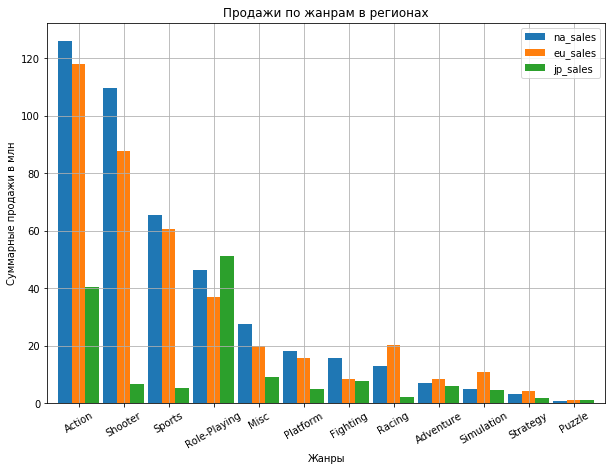

In [53]:
# сводный график по всем регионам
genres.sort_values(['na_sales','eu_sales','jp_sales'], ascending=False).plot(
    kind='bar', y=['na_sales','eu_sales','jp_sales'], 
    figsize=(10,7), grid=True, width=0.9, rot=30,
    title='Продажи по жанрам в регионах');
plt.xlabel('Жанры');
plt.ylabel('Суммарные продажи в млн');

С жанрами ситуация достаточно схожая: европейский и североамериканский регионы имеют много общего и различаются несущественно, однако Япония отличается от обоих регионов довольно значительно. Экшен игры лидируют в Европе и США, а в Японии он занимает второе место после жанра RPG. Также в топ-5 Японии отсутствуют представители спортивных симуляторов, зато довольно популярны файтинги, которые в других регионах имеют довольно средние продажи. 

При этом из-за значительной разницы в объемах рынка, несмотря на популярность и 4-е место в топ-5 Японии, в Америке файтинги продавались лучшими тиражами в актуальный период — 15.5 млн против 7.6 млн копий. Единственный рынок, где японские продажи превзошли другие регионы это RPG — 51 млн против 46.4 млн в Америке, и, соответственно, 37 млн копий в Европе.

Можно сказать, что небольшие особенности есть и у Европы с Северной Америкой, но, как правило, это лишь незначительная разница в большей или меньшей популярности какого-то определенного жанра (например, гонки и симуляторы в Европе более популярны, чем везде, а файтинги лучше всего продаются в США). С Японией разница у обоих регионов нередко довольна велика, а японский рынок включает в себя не только другие жанры, но и другие игры внутри этих жанров в связи со значительными культурными различиями и особенностями азиатского и западного рынка.

### Влияние рейтинга ESRB

In [54]:
rating = data_relevant.query('rating == rating')
norating = data_relevant.query('rating != rating')

print(rating['rating'].count(), "игр c рейтингом ESRB")
print(len(norating['rating']), "игр без рейтинга ESRB")
print()
print(len(data_relevant['rating']), 'игры всего')

1256 игр c рейтингом ESRB
977 игр без рейтинга ESRB

2233 игры всего


In [55]:
# продажи игр с рейтингом в актуальный период
rating.pivot_table(index='rating', values=['na_sales','eu_sales', 'jp_sales'], aggfunc=['mean', 'sum'], margins=True).round(2)

mean                        sum                  
       eu_sales jp_sales na_sales eu_sales jp_sales na_sales
rating                                                      
E          0.28     0.05     0.26    83.36    15.14    79.05
E10+       0.17     0.02     0.22    42.69     5.89    54.24
M          0.39     0.04     0.45   145.32    14.11   165.21
T          0.13     0.06     0.15    41.95    20.59    49.79
All        0.25     0.04     0.28   313.32    55.73   348.29

In [56]:
# продажи игр без рейтинга в актуальный период
norating[['na_sales', 'eu_sales', 'jp_sales']].agg(['mean', 'sum'])

,na_sales,eu_sales,jp_sales
mean,0.091525,0.080768,0.087052
sum,89.420000,78.910000,85.050000


Для проверки влияния рейтинга на продажи можно провести статистический тест. Я сформулировал две гипотезы: 
1. Игры с рейтингом ESRB и без рейтинга продаются одинаково
2. Игры с рейтингом ESRB и игры без рейтинга в Японии продаются одинаково 

Для первой гипотезы $H_0$ уже сформулирована выше, а $H_1$ звучит следующим образом: **среди всех регионов средний объем продаж игр с рейтингом ESRB и без рейтинга различается**.

$H_0$ для второй гипотезы также уже сформулирована выше, а $H_1$ звучит так: **средние продажи игр в Японии с рейтингом ESRB и без рейтинга различаются **. 

Альтернативные гипотезы в обоих случаях двухсторонние.

In [57]:
# t-test первой гипотезы

alpha = 0.05

results_esrb = st.ttest_ind(rating['total_sales'], norating['total_sales']) 

print('p-значение:', results_esrb.pvalue)
if results_esrb.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  

p-значение: 3.529620860640184e-12
Отвергаем нулевую гипотезу


In [58]:
# t-test второй гипотезы
alpha = 0.05

results_jp = st.ttest_ind(rating['jp_sales'], norating['jp_sales']) 

print('p-значение:', results_jp.pvalue)
if results_jp.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")           

p-значение: 1.8421152405274113e-05
Отвергаем нулевую гипотезу


In [59]:
print(rating.query('jp_sales > 0')['name'].count(), 'игр с рейтингом, проданных в Японии ')
print(rating.query('jp_sales == 0')['name'].count(), 'игр с рейтингом с 0 продажами в Японии')
print()
print(norating.query('jp_sales > 0')['name'].count(),'игр без рейтинга, проданных в Японии')
print(norating.query('jp_sales == 0')['name'].count(), 'игр без рейтинга с 0 продажами в Японии')

475 игр с рейтингом, проданных в Японии 
781 игр с рейтингом с 0 продажами в Японии

712 игр без рейтинга, проданных в Японии
265 игр без рейтинга с 0 продажами в Японии


У ESRB есть несколько значений:
- E (Everyone) — подходит для всех, нет возрастных ограничений
- EC (Early childhood) — для детей младшего возраста
- E10+ - для детей от 10 лет и старше
- T (Teen) - для подростков от 13 лет
- M (Mature) - для взрослых не младше 17 лет
- AO (Adults Only) - только для взрослых от 18 лет

Есть также рейтинг RP (Rating Pending), в случаях когда рейтинг еще не присвоен и ожидается, по аналогии с TBD в оценках, но его рассматривать нет смысла, так как в данных за актуальный период его нет. В данных присутствуют только четыре рейтинга: E, E10+, T, M. 

В актуальный период игр с рейтингом и без рейтинга ESRB примерно одинаково, хотя последних чуть меньше — приблизительно 1200 против 1000, поэтому можно их приблизительно сопоставить.

Игры с рейтингами продавались лучше в Европе и Северной Америке, больше как сами объемы продаж: 313 и 348 млн копий против 89 и 79 млн копий в Европе и Америке соответственно, так и средний уровень — 280 тысяч копий в Европе и 250 в Америке против 91 и 80 тысяч.

Выделяется снова Япония. В ней выросли и общие продажи и средние. 40 тысяч продаж получает в среднем игра с рейтингом, а 87 без него; аналогично по суммарным продажам: 85 млн копий без рейтинга и 55 с рейтингом. Это может быть связано с тем, что система ESRB изначально заточена для североамериканского рынка и отвечает за рейтингование в таких странах как США, Канада и Мексика. Тогда как в Японии свои организации, занимающиеся рейтингованием Computer Entertainment Rating Organization (CERO) и Ethics Organization of Computer Software (EOCS). В Японии значительно больше игр без рейтинга, которые имеют продажи, чем с игр с рейтингом и ненулевыми продажам.

Значения p-value в обеих гипотезах показали, что основания для отказа от нулевой гипотезы имеются, следовательно, игры с рейтингом ESRB и без него, вероятнее всего, действительно продаются по-разному.

## Проверка гипотез

В описании проекта указаны две гипотезы:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Для первой гипотезы нулевая гипотеза уже сформулирована, а альтернативную гипотезу я решил для интереса сделать односторонней: **средние пользовательские рейтинги PC *ниже*, чем Xbox One.** 

Для второй гипотезы, $H_0$ формулируется как: **средние пользовательские рейтинги жанров Action и Sports одинаковы** ($H_1$ уже сформулирована). 

In [60]:
# сохраняем нужные срезы для удобства рассчетов первой гипотезы

xbox_score = data_relevant.query('platform == "XOne"')['user_score']
pc_score = data_relevant.query('platform == "PC"')['user_score']
xbox_score_clean = filtered_data.query('platform == "XOne"')['user_score']
pc_score_clean = filtered_data.query('platform == "PC"')['user_score']

# для понимания выводим средние данные
print(round(xbox_score.mean(), 2),'— cредняя оценка пользователей на Xbox One')
print(round(pc_score.mean(), 2),'— cредняя оценка пользователей на PC')
print()
print(round(xbox_score_clean.mean(), 2),'— cредняя оценка пользователей на Xbox One без выбросов')
print(round(pc_score_clean.mean(), 2),'— cредняя оценка пользователей на PC без выбросов')

6.52 — cредняя оценка пользователей на Xbox One
6.27 — cредняя оценка пользователей на PC

6.53 — cредняя оценка пользователей на Xbox One без выбросов
6.3 — cредняя оценка пользователей на PC без выбросов


In [61]:
# t-test первой гипотезы на двух выборках между собой

alpha = 0.05

results = st.ttest_ind(xbox_score, pc_score, equal_var=False, nan_policy='omit') 
results_clean = st.ttest_ind(xbox_score_clean, pc_score_clean, equal_var=False, nan_policy='omit') 

print('p-значение:', results.pvalue / 2)
if (results.pvalue / 2 < alpha) and (pc_score.mean() < xbox_score.mean()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")          
print()    
print('p-значение:', results_clean.pvalue / 2)

if (results_clean.pvalue / 2 < alpha) and (pc_score.mean() < xbox_score.mean()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")     

p-значение: 0.07379797006715015
Не получилось отвергнуть нулевую гипотезу

p-значение: 0.10890209263442904
Не получилось отвергнуть нулевую гипотезу


In [62]:
# сохраняем нужные срезы для удобства рассчетов второй гипотезы

action_score = data_relevant.query('genre == "Action"')['user_score']
sports_score = data_relevant.query('genre == "Sports"')['user_score']
action_score_clean = filtered_data.query('genre == "Action"')['user_score']
sports_score_clean = filtered_data.query('genre == "Sports"')['user_score']

# для понимания выводим средние данные
print(round(action_score.mean(), 2),'— cредняя оценка пользователей игр жанра Action')
print(round(sports_score.mean(), 2),'— cредняя оценка пользователей игр жанра Sports')
print()
print(round(action_score_clean.mean(), 2),'— cредняя оценка пользователей игр жанра Action без выбросов')
print(round(sports_score_clean.mean(), 2),'— cредняя оценка пользователей игр жанра Sports без выбросов')

6.84 — cредняя оценка пользователей игр жанра Action
5.24 — cредняя оценка пользователей игр жанра Sports

6.78 — cредняя оценка пользователей игр жанра Action без выбросов
5.19 — cредняя оценка пользователей игр жанра Sports без выбросов


In [63]:
# t-test второй гипотезы на двух выборках между собой

alpha = 0.05

results_genre = st.ttest_ind(action_score, sports_score, equal_var=False, nan_policy='omit') 
results_genre_clean = st.ttest_ind(action_score_clean, sports_score_clean, equal_var=False, nan_policy='omit') 

print('p-значение:', results_genre.pvalue)
if results_genre.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")          
print()    
print('p-значение:', results_genre_clean.pvalue)

if results_genre_clean.pvalue< alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")     

p-значение: 1.446003970070351e-20
Отвергаем нулевую гипотезу

p-значение: 7.241290806998422e-14
Отвергаем нулевую гипотезу


Я посчитал, что в данном случае подходит t-test для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, а не test по одной выборке или парным выборкам.

Для сравнения я также включил проверку гипотез для данных без выбросов. Так как в столбцах сохранились пропущенные значения, для корректного t-test пришлось указать nan_policy. Заполнять данные по оценкам средними или нулями, на мой взгляд, в данном случае некорректно, я объяснял это в параграфе про [обработку пропусков](#cell22). 

Полученные по итогам тестов первой гипотезы p-value, не позволяют отвергнуть нулевую гипотезу: средние пользовательские рейтинги одинаковые и рейтинги PC нельзя назвать более высокими, чем у Xbox One. 

Результаты тестов второй гипотез показывают полностью противоположный результат: у нас есть основания опровергнуть нулевую гипотезу, то есть, средние рейтинги пользователей жанров action и sports скорее разные, чем одинаковые. Об этом говорят и средние значения оценок пользователей.

Удаление выбросов при проверке обеих гипотез не изменило результаты. Значения P-value несколько поменялись, но на результаты проверки гипотезы это не повлияло. 


## Общий вывод

Определить закономерности, которые определят успешность игры непросто. Эта информация была бы крайне полезна не только для магазинов, занимающихся продажами игр, но и для издателей и самих разработчиков. Универсальных формул и уникальных рецептов для успеха продаж не существует, однако в ходе анализа набора из почти 17 тысяч тайтлов для разных игровых платформ, можно сделать несколько наблюдений.

Во-первых, высокий уровень продаж можно ожидать от игр для самых актуальных на данный момент платформ: PS4 и Xbox One. Для европейского региона также актуальна платформа PC, пусть и с гораздо меньшими объемами продаж, чем PS и Xbox. Для японского рынка всегда актуальны местные производители, то есть платформы от Nintendo и Sony. На данный момент, cамый популярной платформой в Японии является Nintendo 3DS, но уже в следующем году будет представлен Nintendo Switch, которая должна получить высокий уровень продаж в Японии. *Топ-3 популярных консолей по регионам практически не отличается: в Европе и Северной Америке это PS4, Xbox One и, на выбор, PS3 или Xbox360. Конечно, Xbox имеет традиционно лучшие показатели в Северной Америке, а PS в Европе и Азии. Однако примечательно, что в Японии в топе портативные консоли 3DS и PS Vita, а актуальное поколение Playstation 4 продается хуже, чем предыдущее. Такая ситуации уникальна и не повторяется в других регионах ни на одной платформе.*

Игры для предыдущего поколения консолей еще продаются, но уже несколько лет как сбавили обороты, PS3 и Xbox 360 их жизненный цикл завершается и рассчитывать на высокие продажи игр для этих платформ нецелесообразно.

Что касается жанров, то здесь все достаточно очевидно: экшен-игры, шутеры (между жанрами достаточно размытая и тонкая грань и нередко невозможно определить точно) и спортивные симуляторы всегда и практически везде продаются хорошо. "*Практически" — потому что есть Япония, где спортивные игры непопулярны, зато в топ-5 есть файтинги, которые не так популярны в Европе и Америке, а лидируют вообще ролевые игры с объемом продаж, превышающим другие регионы, 51 млн против 46 млн и 37 млн в североамериканском и европейском регионах. При этом, несмотря на популярность файтингов относительно других жанров в Японии, их объемы продаж в Японии ниже североамериканских и даже европейских, где жанр файтингов один из наименее популярных: 7.5 млн проданных копий в Японии против 8.5 млн 15.5 млн в Европе и Америке, соответственно*. 

В плане ожидания уровня продаж ориентироваться на оценки критиков и пользователей не стоит, значимой прямой взаимосвязи нет. 
В данном аспекте, в первую очередь важны не сами оценки, а некоторый порог, ниже которого игры не стоит рассматривать как потенциально кассовые. Условно, игры с пользовательской оценкой меньше 4-5 баллов и оценкой критиков менее 40-50, с очень большой вероятностью не будут успешными и обретут популярность. 

В качестве потенциальных бестселлеров, возможно, стоит рассматривать популярные игровые франшизы и серии: такие как GTA, Call of Duty, Battlefield, FIFA. Для японского рынка это серии: Mario Cart, Super Smash Bros, Pokemon, Monster Hunter и Animal Crossing. 

*Также стоит отметить некоторое влияние возрастных рейтингов ESRB на продажи игры в разных регионах. Если в Европе и Северной Америке, большая часть выпущенных с 2013 года игр в базе имеет рейтинг и намного лучше продается с рейтингом ESRB, то в Японии ситуация противоположная: за этот же период больше игр без рейтинга и они продаются гораздо лучше, чем имеющие рейтинг ESRB. Причем продажи выше как в среднем на каждую игру, так и суммарно: 40 тысяч продаж в среднем и 55 млн общих продаж у игры с рейтингом против 87 тысяч продаж и 85 млн без него. Для сравнения в среднем одна игра с рейтингом в Европе продается 250 тыс. копий, а без него 80 тыс.*


*В Японии не только ниже объемы продаж в каждом жанре, кроме RPG, но и меньше игр, продающихся тиражом от [1 млн копий](#cell402). Таких тайтлов в Европе и Северной Америке в 4-5 раз больше. При этом количество продаваемых в Японии игр сопоставимо с другими регионами.* 

Безусловно, нельзя не отметить также значительную разницу в объемах продаж Европы, Северной Америки и Японии, однако здесь важно помнить про различия и в населении. Так, по данным на 2016 год в [Европе](https://www.worldometers.info/world-population/europe-population/) проживает около 744 млн человек, в [Северной Америке](https://www.worldometers.info/world-population/northern-america-population/) — около 350 млн, тогда как население [Японии](https://www.worldometers.info/world-population/japan-population/) 127 млн человек и демонстрируемый японским игровым рынком объем продаж с учетом разницы в популяции выглядит впечатляюще. Также как и в североамериканском регионе, в Японии на одного жителя приходится больше одной покупки игры, тогда как в Европе этот показатель гораздо ниже.  

В целом, можно заметить, что европейский и севериамериканский игровые рынки крайне схожи, а японский существенно от них отличается. Как уже было сказано ранее, это в целом может быть связано с множеством факторов, но одними из ключевых в данном случае, вероятно, являются культурные различия между западноевропейской(североамериканской) игровой индустрией и культурой в целом, в широком понимании этого слова, и азиатской (восточной).